<a href="https://colab.research.google.com/github/210304124278/bubblesort-all-/blob/main/k1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataset = pd.read_csv("yield_prediction.csv")

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop('Yield', axis=1)
y = dataset['Yield']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
y_train

1554      0.120385
18271     0.400000
10095    83.412500
2113      1.002632
18009     1.328462
           ...    
13123     5.608462
19648     0.372308
9845      1.976905
10799     0.530000
2732      0.459231
Name: Yield, Length: 15751, dtype: float64

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
estimators=[
             ('encoder',TargetEncoder()),
            #  ('scaler', StandardScaler()),
            ("clf",XGBRegressor(random_state=0,n_jobs=-1))
        ]
pipe=Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=0, ...))])

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real,Categorical,Integer
from skopt.callbacks import DeadlineStopper, VerboseCallback
search_space={
            'clf__max_depth':Integer(2,8),
            'clf__learning_rate':Real(0.001,1.0,prior='log-uniform'),
             'clf__subsample':Real(0.5,1.0),
             'clf__colsample_bytree':Real(0.5,1.0),
             'clf__colsample_bylevel':Real(0.5,1.0),
             'clf__colsample_bynode':Real(0.5,1.0),
            'clf__reg_alpha':Real(0.0,10.0),
            'clf__reg_lambda':Real(0.0,10.0),
            'clf__gamma':Real(0.0,10.0)

        }

opt=BayesSearchCV(pipe,search_space,cv=3,n_iter=10,scoring='neg_mean_squared_error',random_state=0)


In [ ]:
opt.fit(X_train,y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=No...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=['Crop', 'Season', 'State'])),
                ('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=0.7654820824760737,
                              colsample_bynode=0.8380397544384568,
                              colsample_bytree=0.8113548763147185, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gam...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.376904649518354, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=0, ...))])

In [ ]:
opt.best_score_

-28436.438294416483

In [ ]:
opt.score(X_test,y_test)

-21350.280890755494

In [ ]:
opt.predict(X_test)

array([57.84317   ,  4.4283414 ,  0.6127661 , ...,  4.901567  ,
       -0.08286285,  3.4154716 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate mean squared error
mse = mean_absolute_error(y_test,opt.predict(X_test) )
print("mean_absolute_error:", mse)

mean_absolute_error: 10.090092639004766


In [ ]:
from sklearn.metrics import r2_score
rsq = r2_score(y_test,opt.predict(X_test) )
print("r2 score:", rsq)


r2 score: 0.972464027662567


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
_
mse = mean_squared_error(y_test,opt.predict(X_test) )
rmse=np.sqrt(mse)
print("mse:" ,mse)
print(" root mean square error:", rmse)

mse: 21350.280890755494
 root mean square error: 146.11735314724083


In [ ]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=['Crop', 'Season', 'State'])),
 ('clf',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.7654820824760737,
               colsample_bynode=0.8380397544384568,
               colsample_bytree=0.8113548763147185, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=6.466799410716572,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.376904649518354,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, random_state=0, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

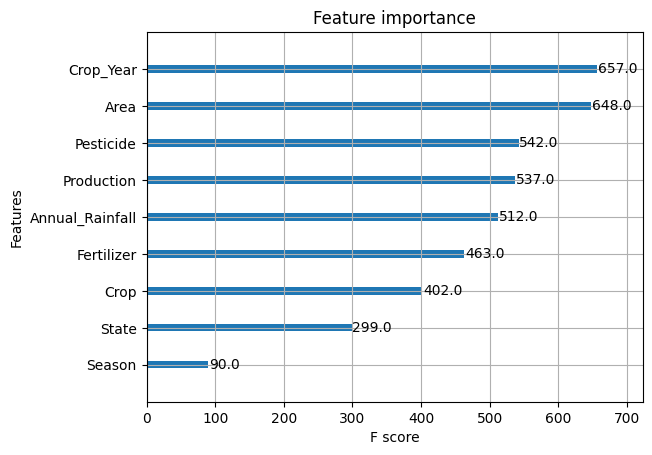

In [ ]:
from xgboost import plot_importance
xgboost_step=opt.best_estimator_.steps[1]
xgboost_model=xgboost_step[1]
plot_importance(xgboost_model._Booster)